# Imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from pandas.core import datetools

from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import and Clean Data

Import

In [38]:
daily = pd.read_csv("../datasets/daily.csv", index_col=0)
print(daily.shape)
daily.tail()

(4515, 5)


,1. open,2. high,3. low,4. close,5. volume
2017-12-05,2639.7800,2648.7200,2627.7300,2629.5701,3539040000
2017-12-06,2626.2400,2634.4099,2624.7500,2629.2700,3229000000
2017-12-07,2628.3799,2640.9900,2626.5300,2636.9800,3292400000
2017-12-08,2646.2100,2651.6499,2644.1001,2651.5000,3106150000
2017-12-11,2652.1899,2660.3301,2651.4700,2659.9900,3091950000


Clean as described in Conclusion of EDA

In [39]:
daily.columns = [x.split()[1] for x in daily.columns]
daily.tail()

,open,high,low,close,volume
2017-12-05,2639.7800,2648.7200,2627.7300,2629.5701,3539040000
2017-12-06,2626.2400,2634.4099,2624.7500,2629.2700,3229000000
2017-12-07,2628.3799,2640.9900,2626.5300,2636.9800,3292400000
2017-12-08,2646.2100,2651.6499,2644.1001,2651.5000,3106150000
2017-12-11,2652.1899,2660.3301,2651.4700,2659.9900,3091950000


In [40]:
df_inds = pd.read_csv("../datasets/technical_indicators.csv", index_col=0)
print(df_inds.shape)
df_inds.tail()

(4515, 65)


,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,PLUS_DM,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC
2017-12-05,2634.505,2633.0702,2632.86,2630.9070,2629.6529,2634.505,2632.0071,2238.4404,2458.7267,2635.1249,...,11.3534,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08
2017-12-06,2629.420,2630.5367,2629.37,2628.9712,2628.7524,2629.420,2630.7906,2239.5503,2460.4321,2630.7465,...,5.6767,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08
2017-12-07,2633.125,2634.8322,2634.41,2635.7422,2636.4944,2633.125,2633.1818,2240.6636,2462.1976,2633.4814,...,9.4184,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08
2017-12-08,2644.240,2645.9441,2646.66,2649.9514,2651.2345,2644.240,2641.3232,2241.7807,2464.0906,2643.9513,...,15.3691,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08
2017-12-11,2655.745,2655.3080,2657.16,2659.7651,2660.3427,2655.745,2649.6195,2242.9020,2466.0496,2654.6797,...,16.3647,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09


In [41]:
df = pd.concat((daily, df_inds), axis=1)
df.index = pd.to_datetime(daily.index)
df.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,PLUS_DM,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC
2017-12-05,2639.7800,2648.7200,2627.7300,2629.5701,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,11.3534,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08
2017-12-06,2626.2400,2634.4099,2624.7500,2629.2700,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,5.6767,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08
2017-12-07,2628.3799,2640.9900,2626.5300,2636.9800,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,9.4184,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08
2017-12-08,2646.2100,2651.6499,2644.1001,2651.5000,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,15.3691,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08
2017-12-11,2652.1899,2660.3301,2651.4700,2659.9900,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,16.3647,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09


Visualize

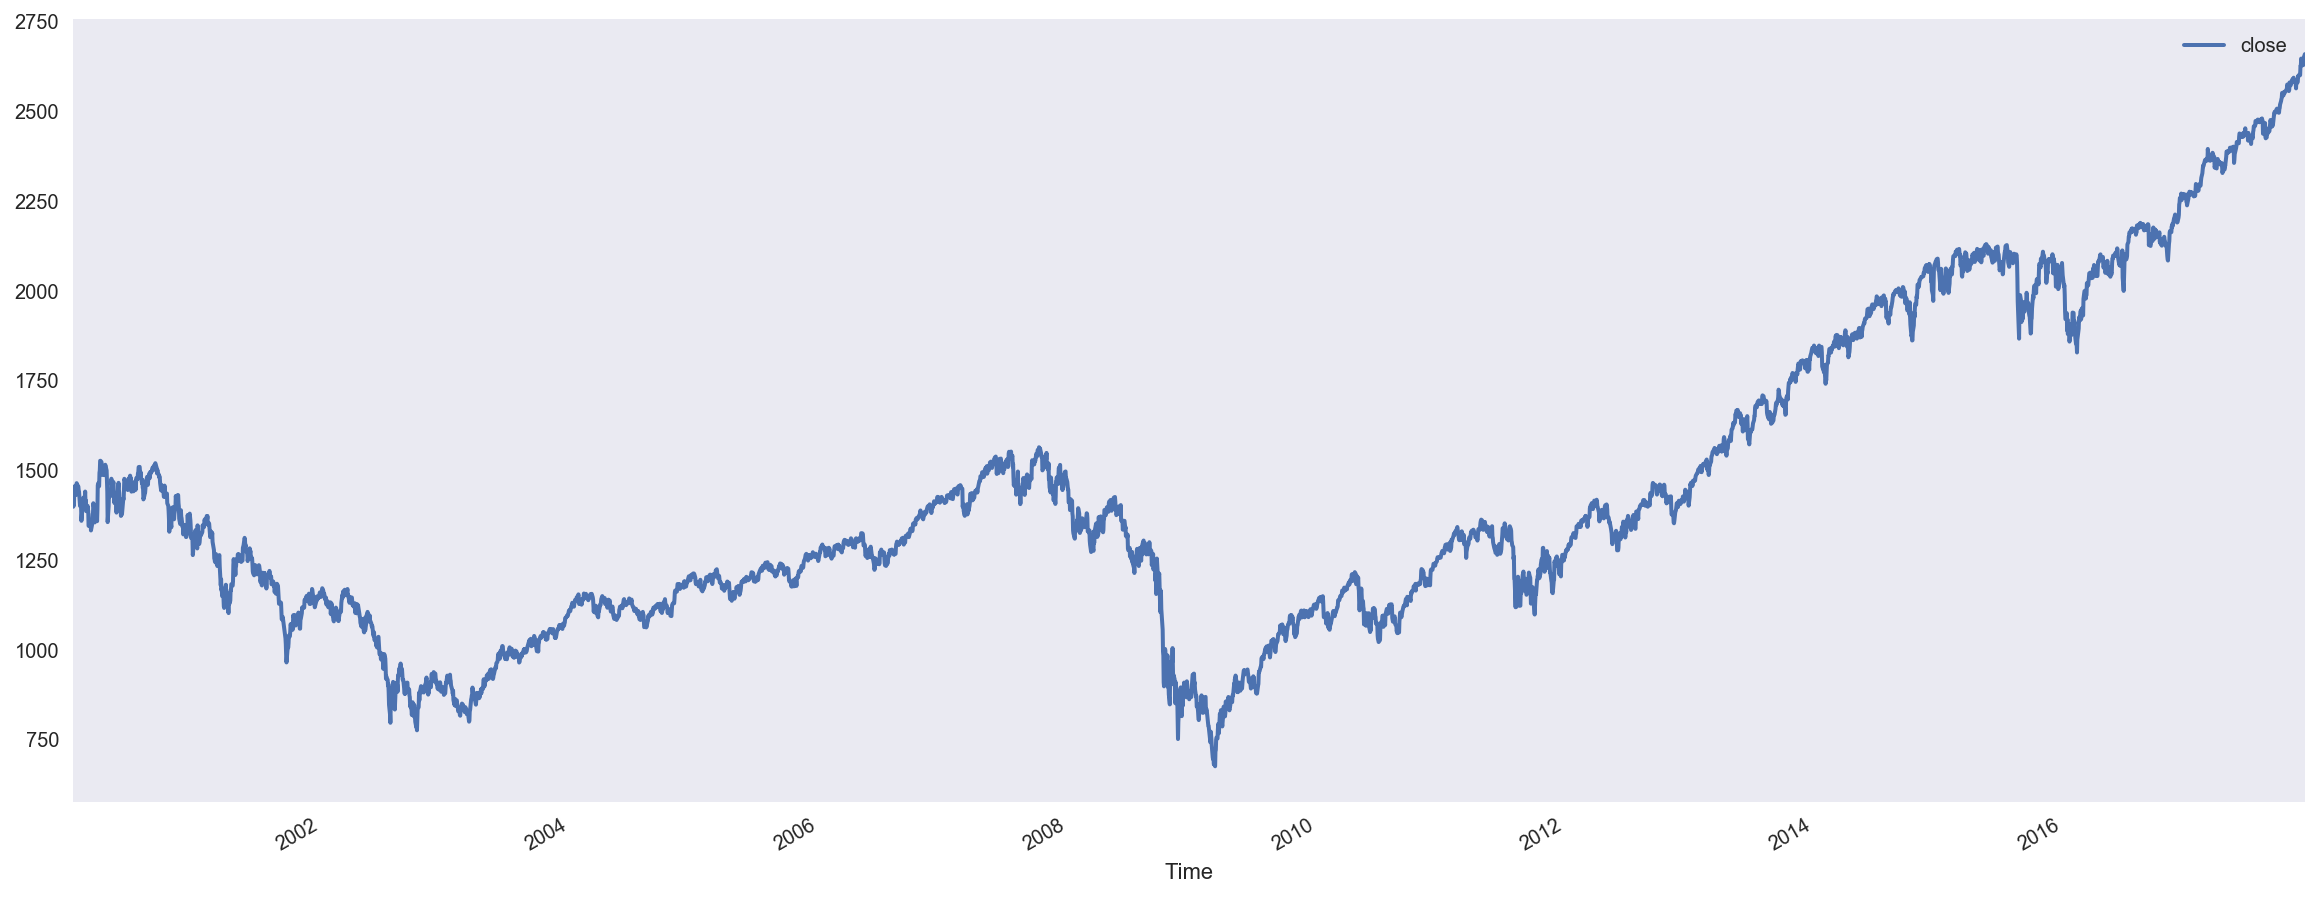

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
df.plot(y='close', ax=ax, lw=2)
plt.xlabel('Time')
plt.grid()
plt.show()

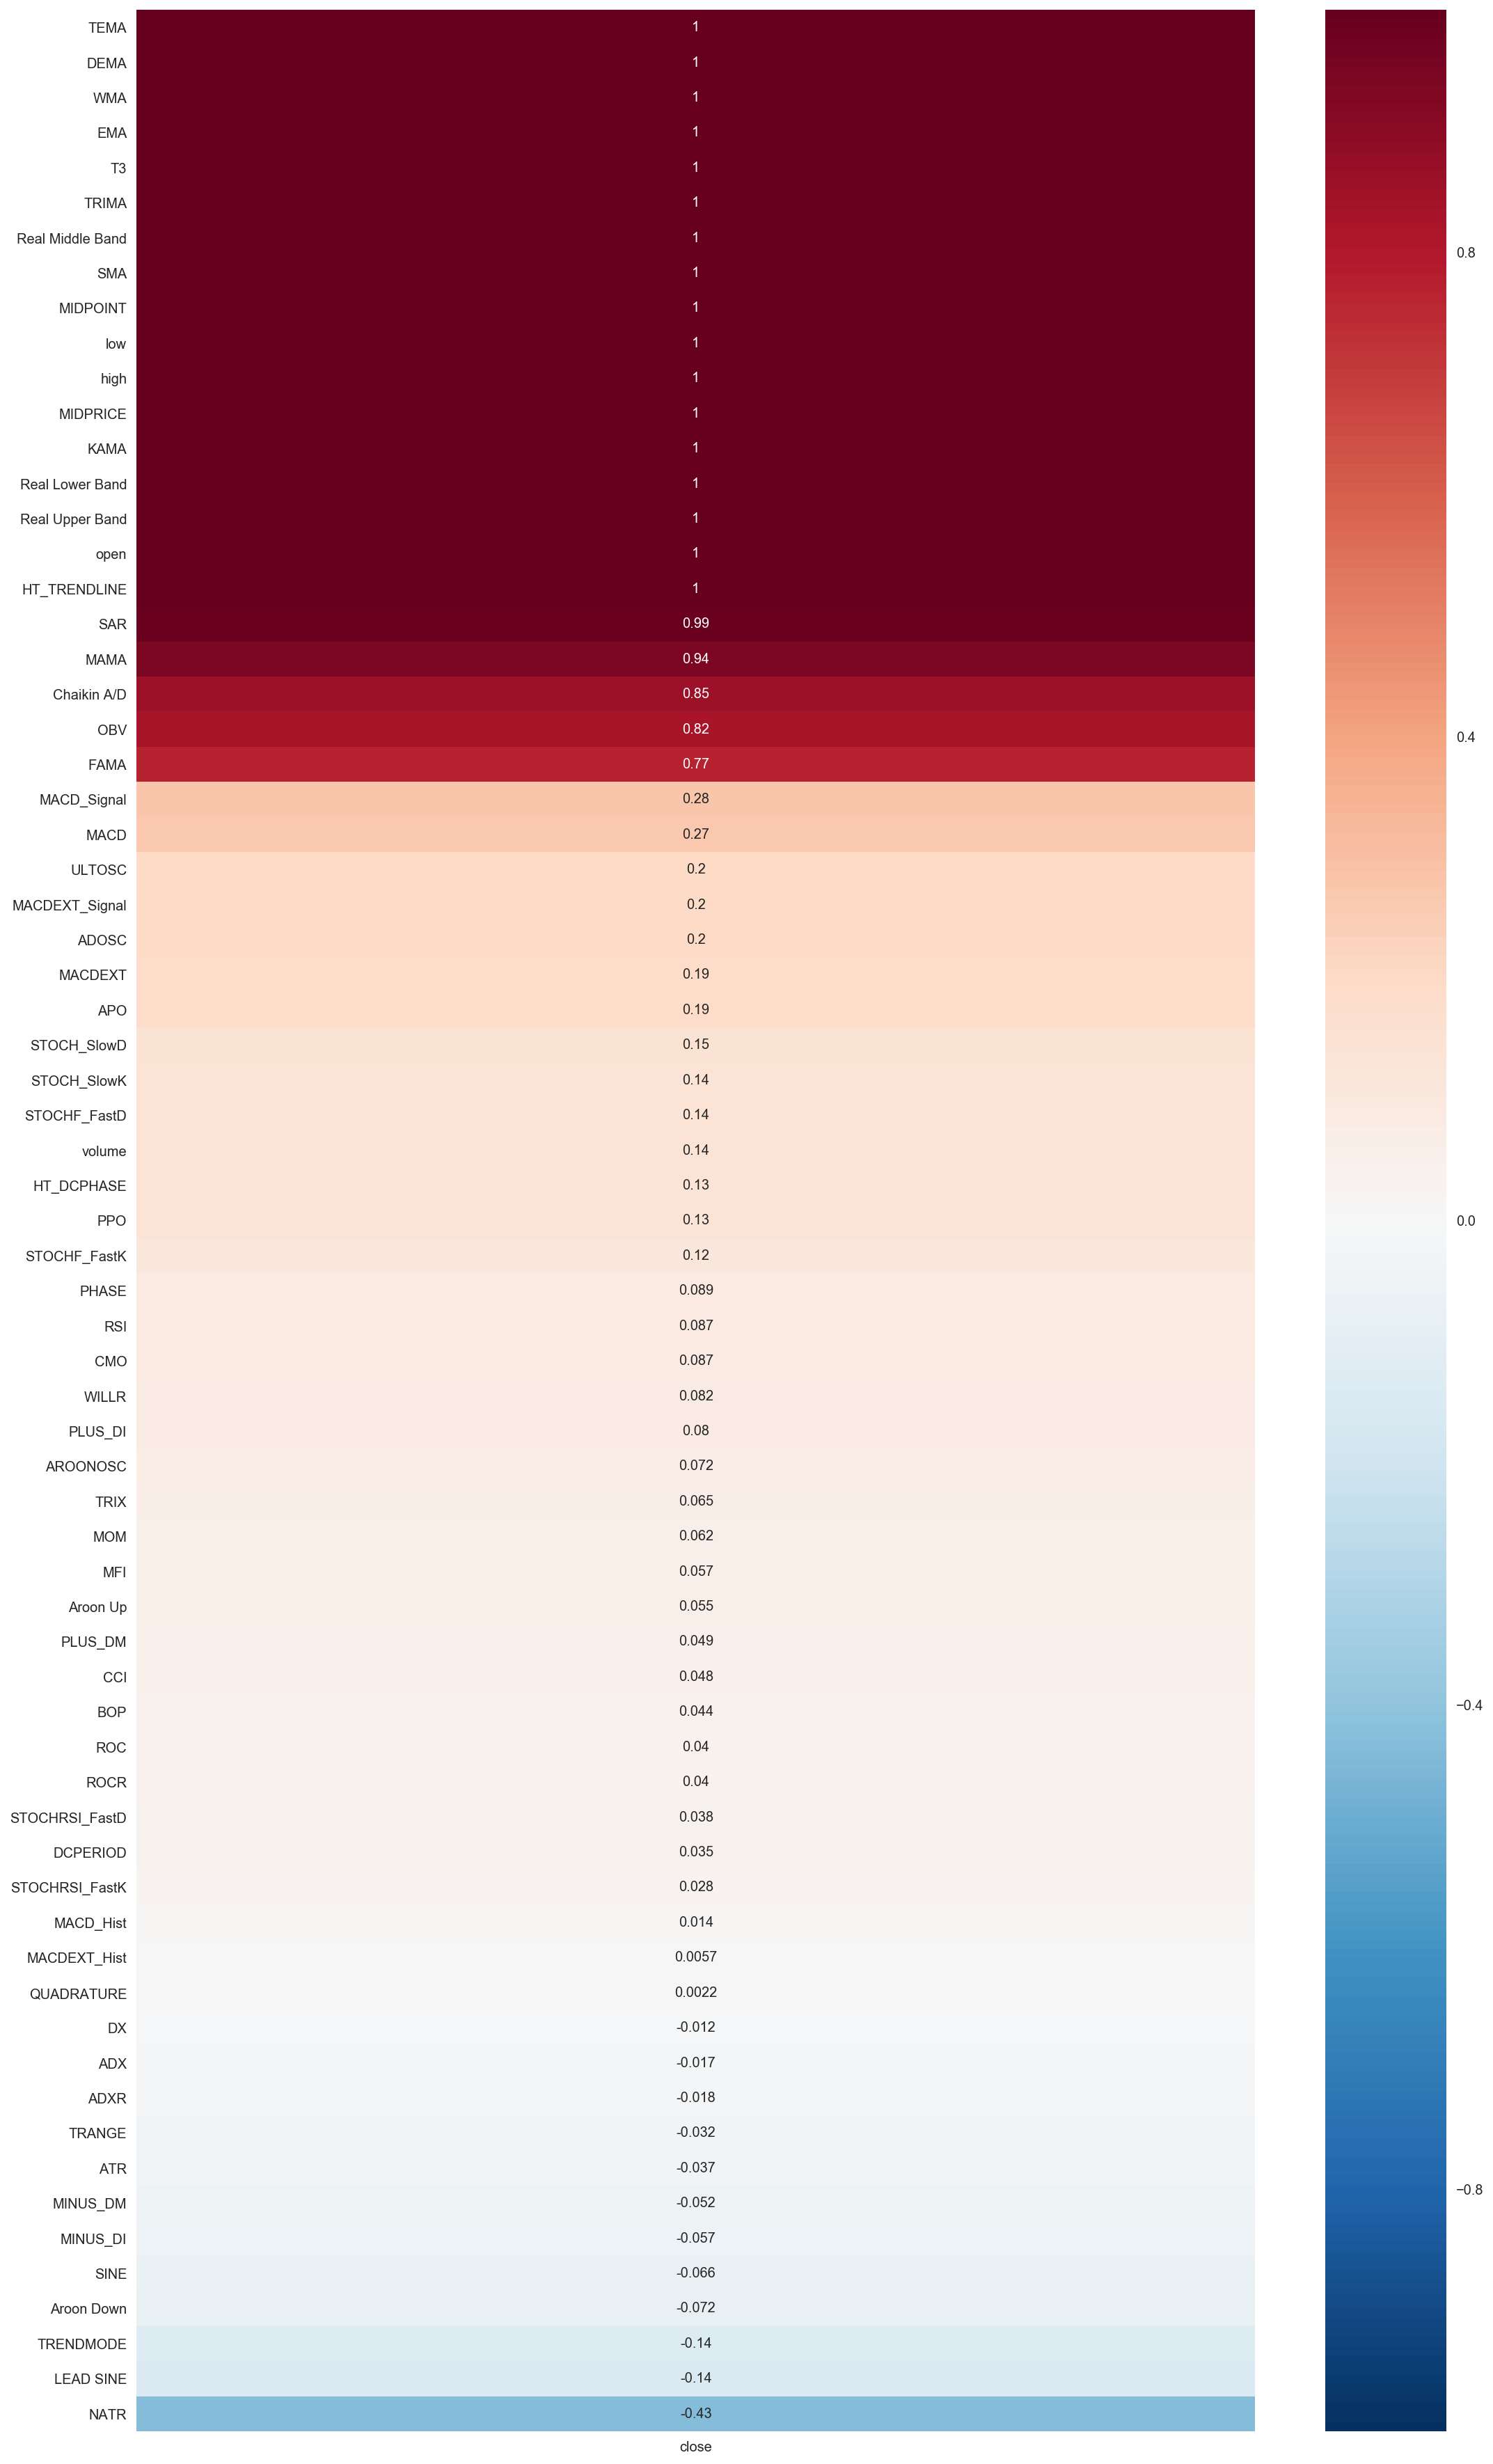

In [43]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df.corr()[['close']].sort_values('close', ascending=False)[1:], ax=ax, annot=True)

# Make some Models

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [82]:
df.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,PLUS_DM,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC
2017-12-05,2639.7800,2648.7200,2627.7300,2629.5701,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,11.3534,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08
2017-12-06,2626.2400,2634.4099,2624.7500,2629.2700,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,5.6767,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08
2017-12-07,2628.3799,2640.9900,2626.5300,2636.9800,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,9.4184,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08
2017-12-08,2646.2100,2651.6499,2644.1001,2651.5000,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,15.3691,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08
2017-12-11,2652.1899,2660.3301,2651.4700,2659.9900,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,16.3647,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09


In [78]:
df1 = df.copy()
df1.open = df1.close
df1.high = df1.high.shift(1)
df1.low = df1.low.shift(1)
df1.close = df1.close.shift(-1)
df1.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,PLUS_DM,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC
2017-12-05,2629.5701,2665.1899,2639.0300,2629.27,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,11.3534,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08
2017-12-06,2629.2700,2648.7200,2627.7300,2636.98,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,5.6767,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08
2017-12-07,2636.9800,2634.4099,2624.7500,2651.50,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,9.4184,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08
2017-12-08,2651.5000,2640.9900,2626.5300,2659.99,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,15.3691,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08
2017-12-11,2659.9900,2651.6499,2644.1001,NaN,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,16.3647,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09


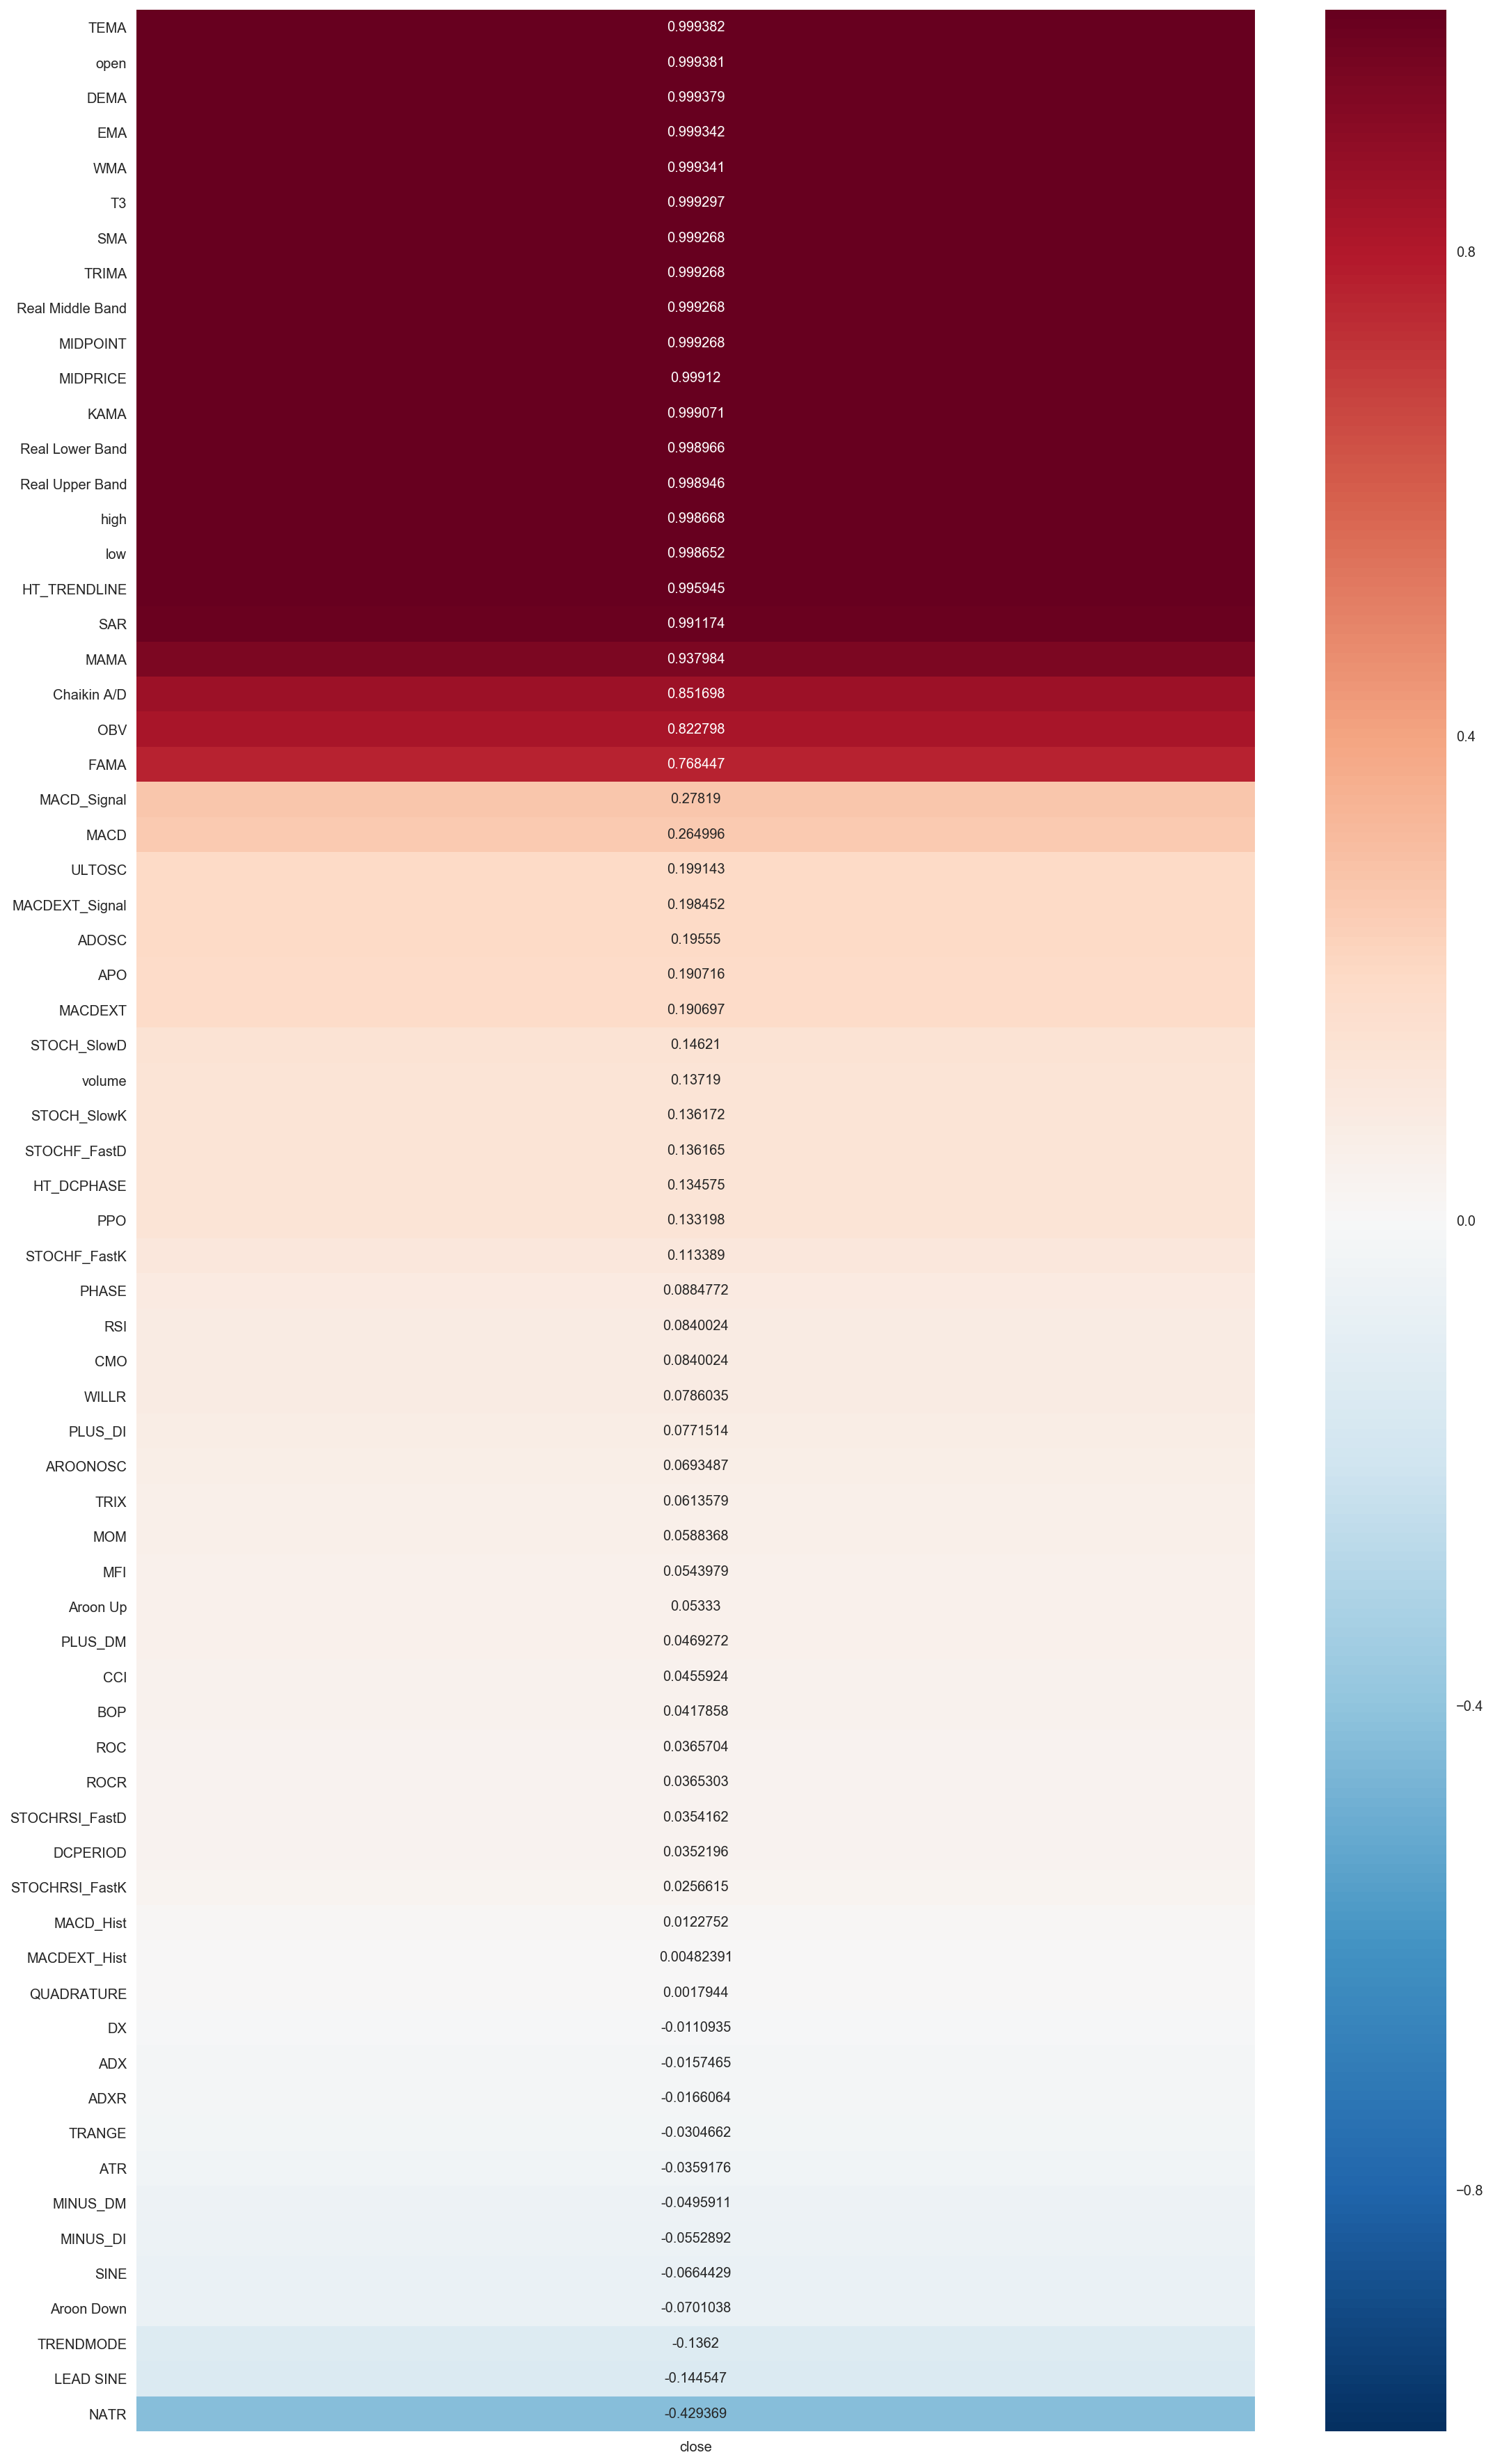

In [81]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df1.corr()[['close']].sort_values('close', ascending=False)[1:], ax=ax, annot=True, fmt='.6g')

In [83]:
X = df1.drop('close', axis=1)[-4000:-1]
y = df1.close.values[-4000:-1]

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2999, 69) (2999,)
(1000, 69) (1000,)


In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)
mean_squared_error(y_test, preds)

0.998984123864


201.3905441995004

In [48]:
from sklearn.dummy import DummyRegressor

In [85]:
dr = DummyRegressor()
dr.fit(X_train, y_train)
dr.score(X_test, y_test)

-0.0027421007234826877

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [86]:
r2_score(df1.close[-4000:-1], df1.open[-4000:-1])

0.99893530110041329

In [87]:
mean_squared_error(df1.close[-4000:-1], df1.open[-4000:-1])

211.90000034853713

In [88]:
mean_absolute_error(df1.close[-4000:-1], df1.open[-4000:-1])

10.158471217804451

#### Classification

In [91]:
df2 = df1.copy()
df2['increased'] = (df2.close > df2.open).astype(int)

In [93]:
df2.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC,increased
2017-12-05,2629.5701,2665.1899,2639.0300,2629.27,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08,0
2017-12-06,2629.2700,2648.7200,2627.7300,2636.98,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08,1
2017-12-07,2636.9800,2634.4099,2624.7500,2651.50,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08,1
2017-12-08,2651.5000,2640.9900,2626.5300,2659.99,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08,1
2017-12-11,2659.9900,2651.6499,2644.1001,NaN,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09,0


In [94]:
df2.increased.value_counts()

1    2405
0    2110
Name: increased, dtype: int64

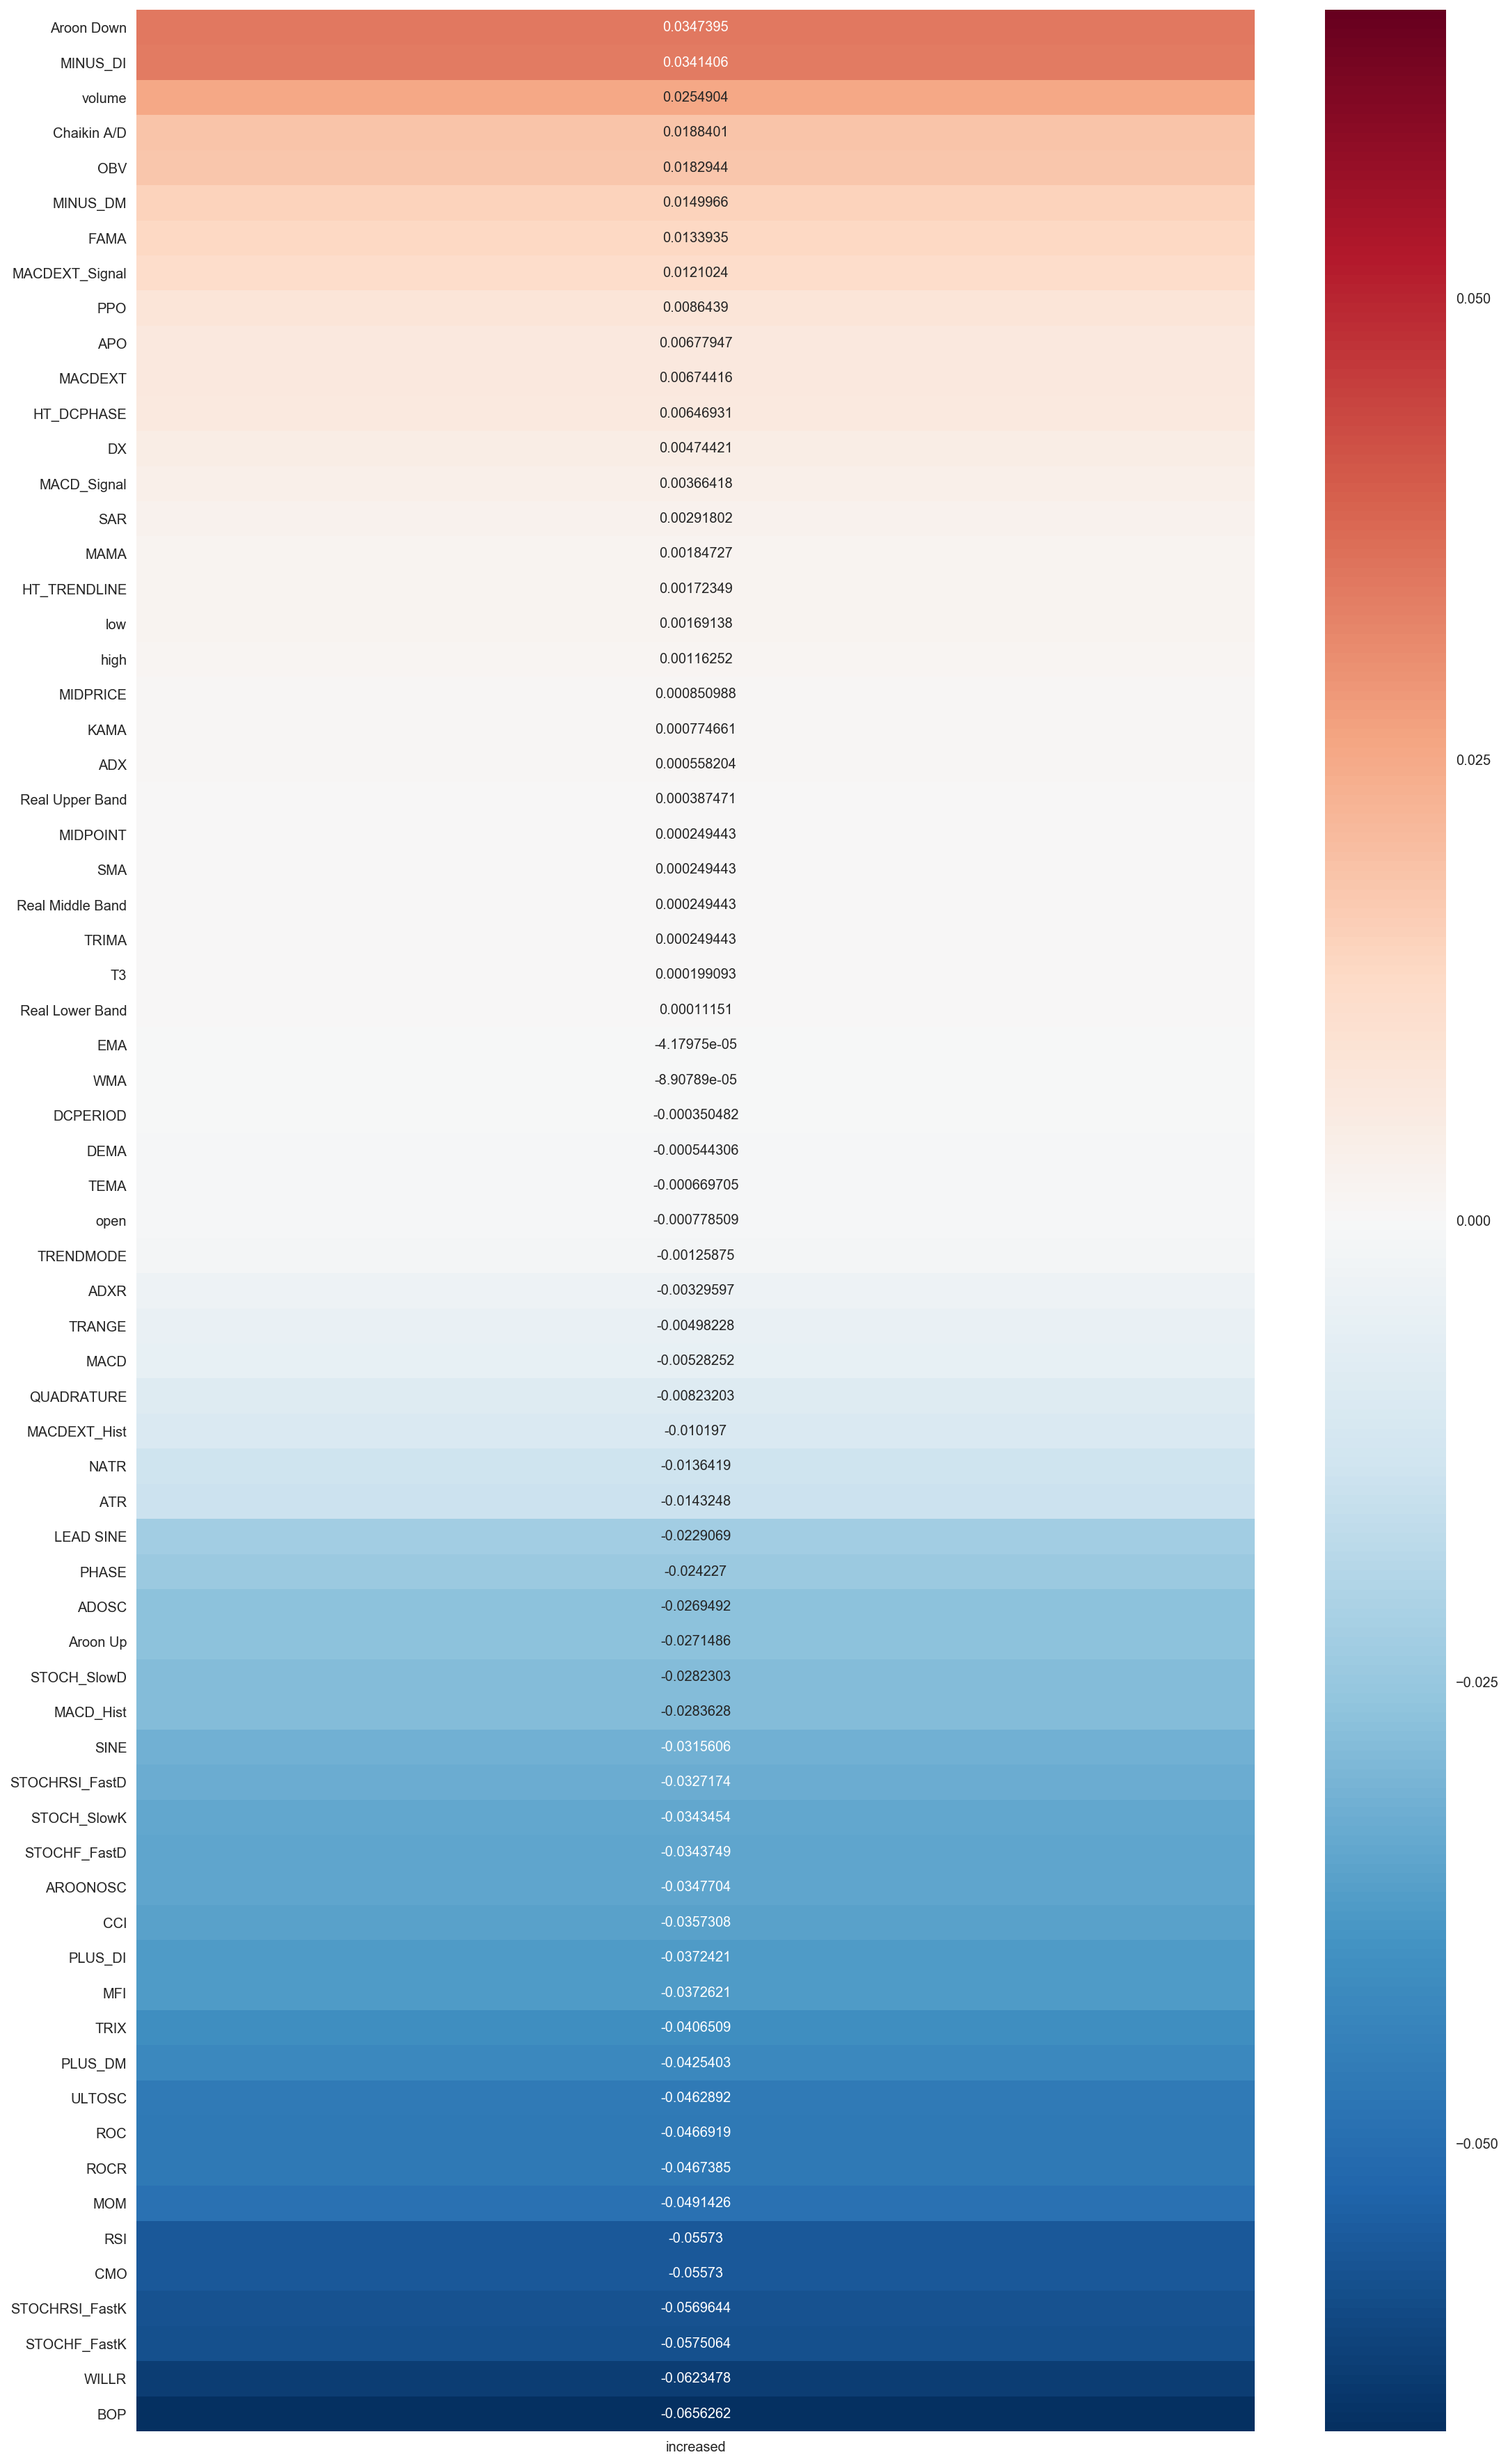

In [107]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df2.drop('close', axis=1).corr()[['increased']].sort_values('increased', ascending=False)[1:], ax=ax, annot=True, fmt='.6g')

In [95]:
from sklearn.linear_model import LogisticRegression

In [220]:
X = df2.drop(['close', 'increased'], axis=1)[-4000:-1].copy()
y = df2.increased.values[-4000:-1].copy()

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2999, 69) (2999,)
(1000, 69) (1000,)


In [221]:
baseline = y_test.sum() / y_test.shape[0]
baseline

0.54000000000000004

In [271]:
ovrbaseline = y.sum() / y.shape[0]
ovrbaseline

0.53963490872718178

In [222]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
logReg.score(X_test, y_test)

0.53500000000000003

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.51900000000000002

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [224]:
gb = GradientBoostingClassifier(n_estimators=350, max_depth=2)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.56699999999999995

In [227]:
from sklearn.preprocessing import StandardScaler

In [228]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [303]:
gb = GradientBoostingClassifier(n_estimators=330, max_depth=2)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.57299999999999995

In [158]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [186]:
from sklearn.metrics import accuracy_score

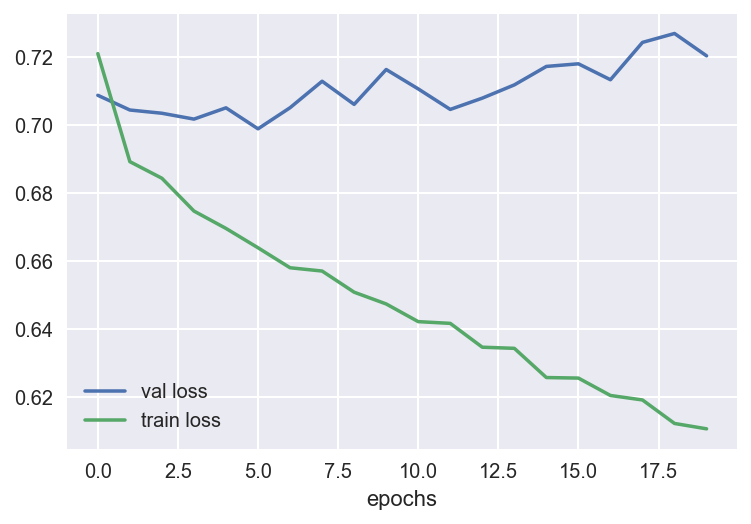

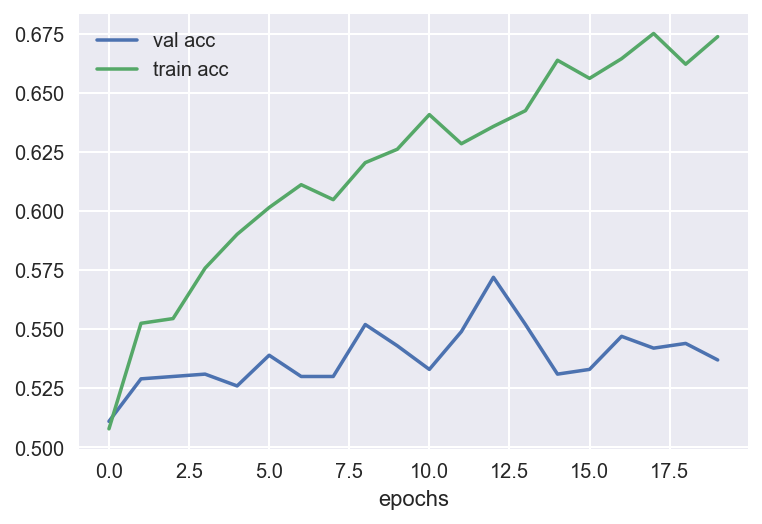

In [289]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation="linear"))
model.add(Dense(X_train.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)

plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['loss'], label='train loss')
plt.xlabel('epochs')
plt.legend()
plt.show();

plt.plot(history.history['val_acc'], label='val acc')
plt.plot(history.history['acc'], label='train acc')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [290]:
preds = model.predict_classes(X_test)
preds.sum()

1000/1000 [==============================] - 1s 731us/step


631

In [292]:
accuracy_score(y_test, preds)

0.53700000000000003

In [259]:
y_test.sum()

540

# DIFFS AND THINGS AND STUFFS

In [304]:
df3 = df1.copy()
df3['diff'] = (df3.close - df3.open)

In [305]:
df3.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC,diff
2017-12-05,2629.5701,2665.1899,2639.0300,2629.27,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08,-0.3001
2017-12-06,2629.2700,2648.7200,2627.7300,2636.98,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08,7.7100
2017-12-07,2636.9800,2634.4099,2624.7500,2651.50,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08,14.5200
2017-12-08,2651.5000,2640.9900,2626.5300,2659.99,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08,8.4900
2017-12-11,2659.9900,2651.6499,2644.1001,NaN,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09,NaN


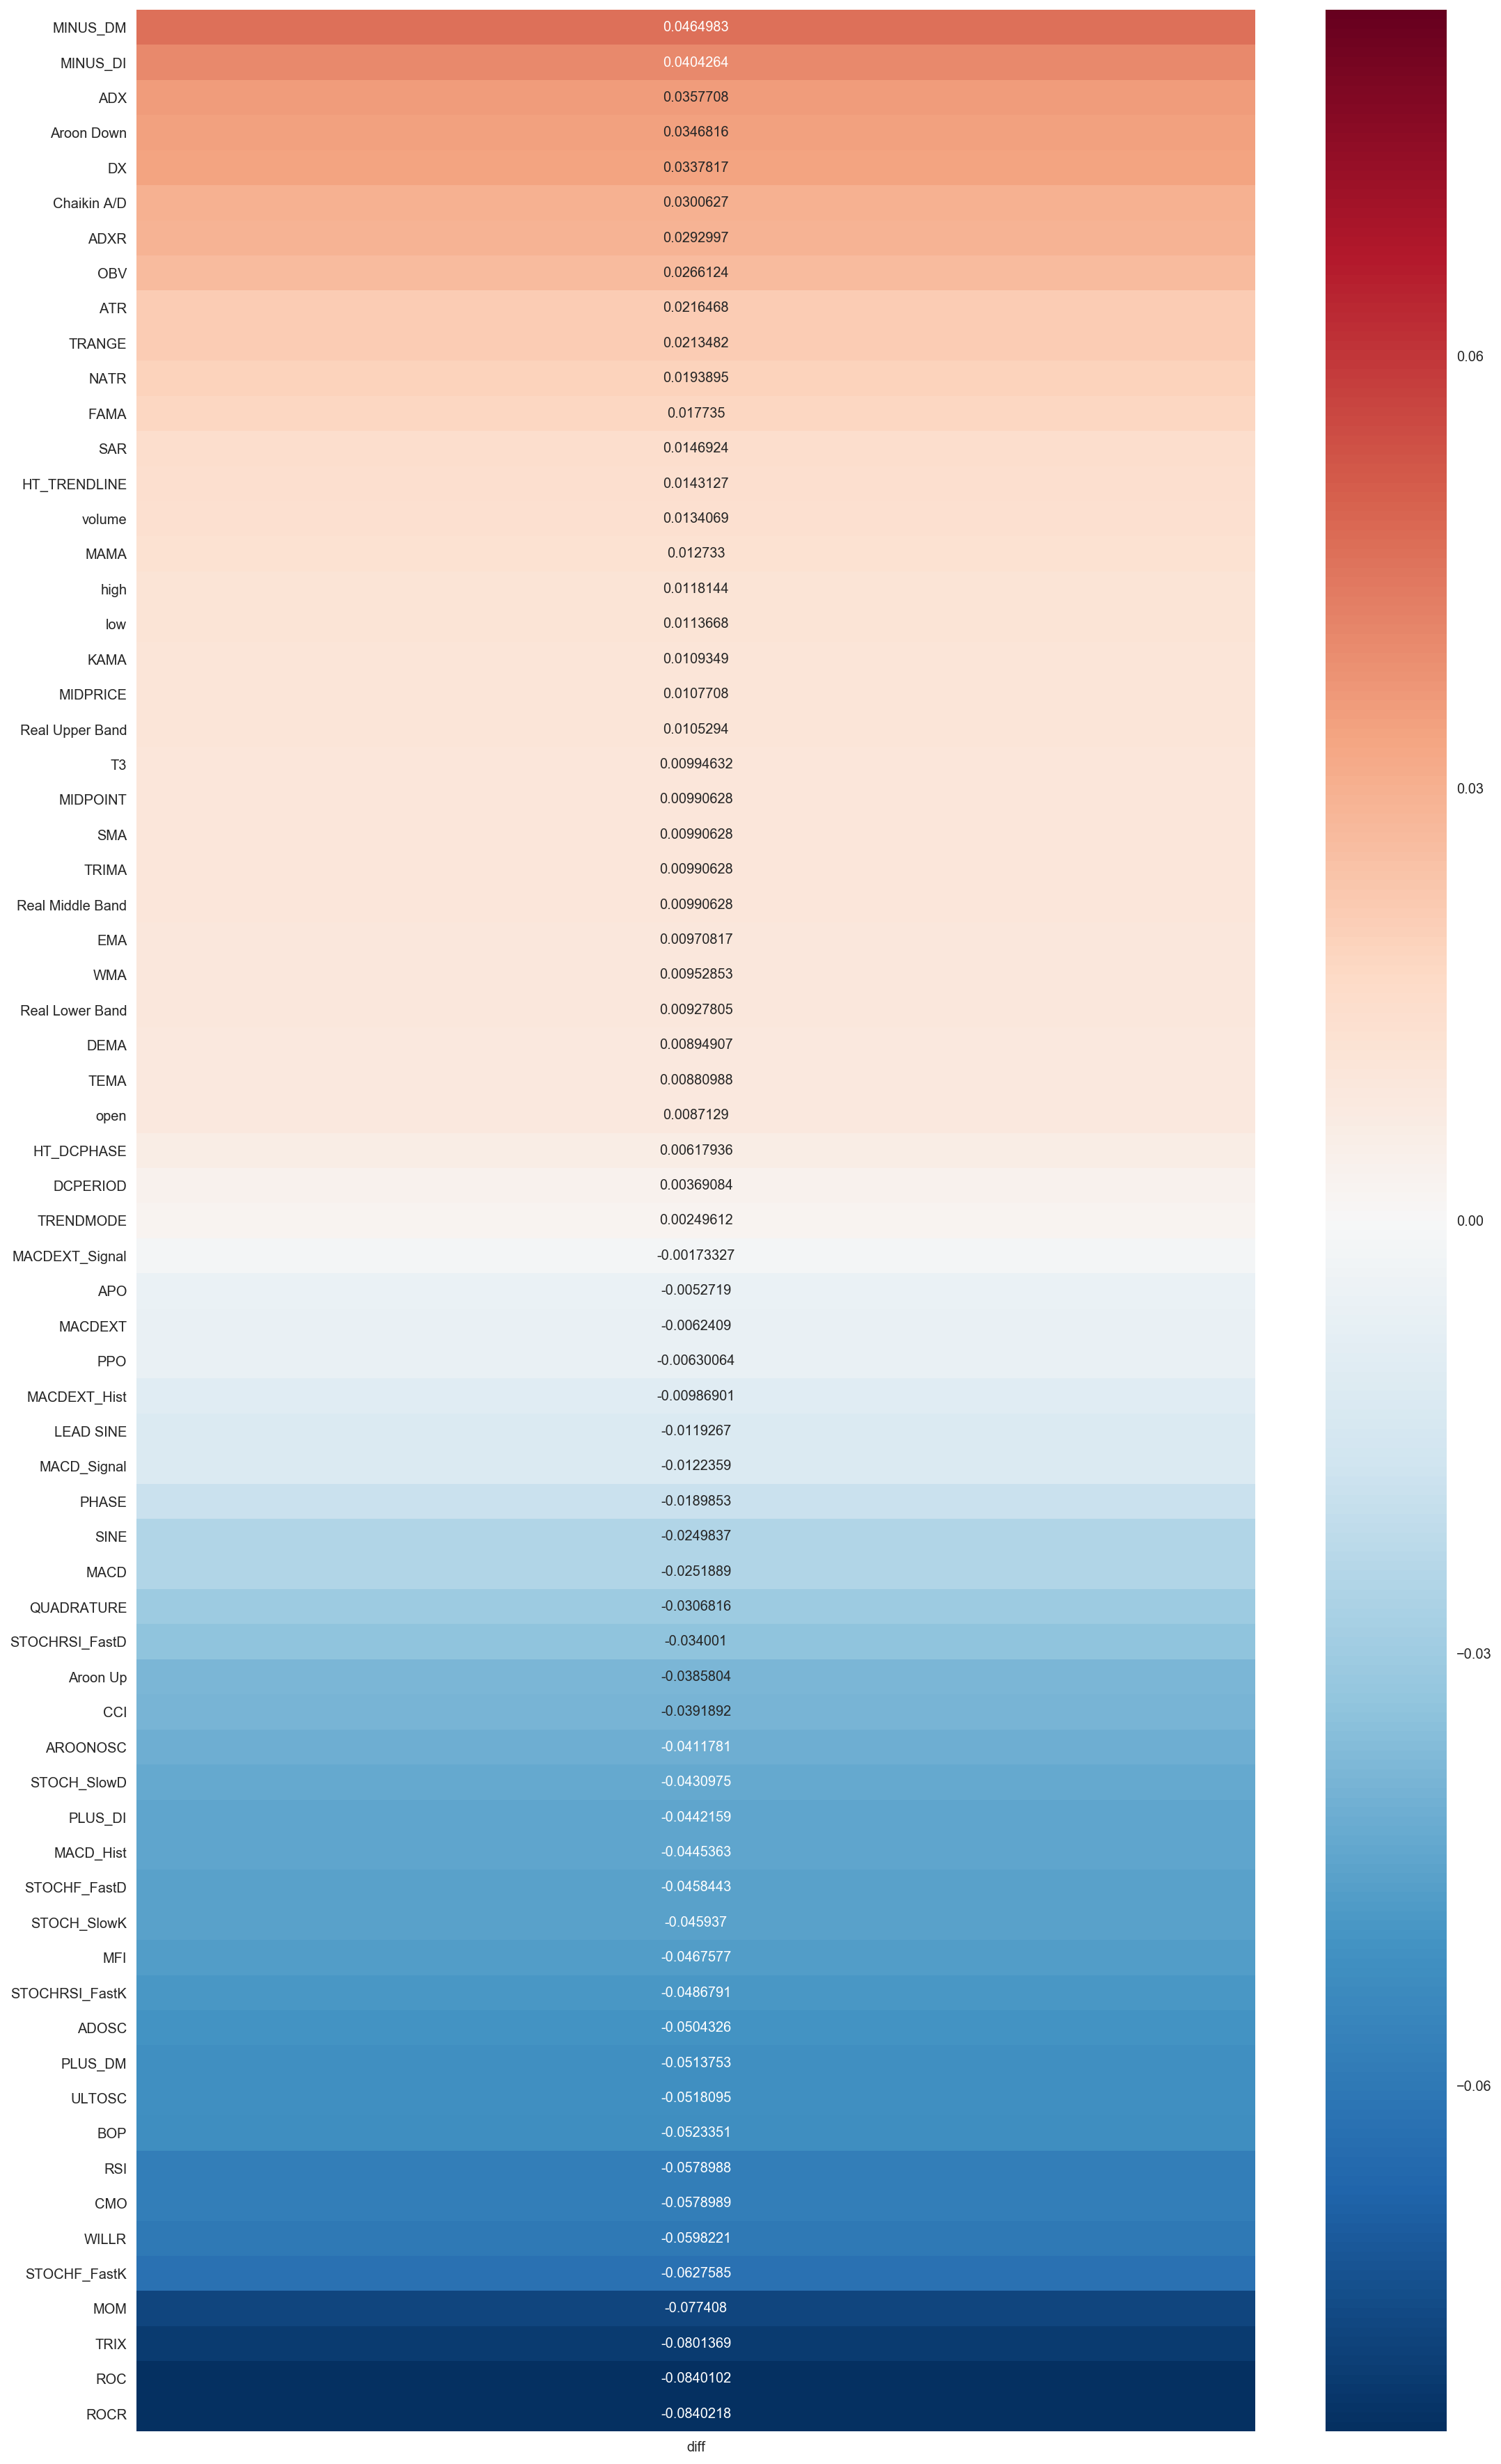

In [124]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df3.drop('close', axis=1).corr()[['diff']].sort_values('diff', ascending=False)[1:], ax=ax, annot=True, fmt='.6g')

In [306]:
X = df3.drop(['close', 'diff'], axis=1)[-4000:-100].copy()
y = df3['diff'].values[-4000:-100].copy()

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2925, 69) (2925,)
(975, 69) (975,)


In [127]:
dr = DummyRegressor()
dr.fit(X_train, y_train)
dr.score(X_test, y_test)

-0.00018423271219458748

In [131]:
r2_score(y, np.zeros_like(y))

-0.00068932059037529747

In [308]:
mean_squared_error(y, np.zeros_like(y))

214.58607704322051

In [133]:
mean_absolute_error(y, np.zeros_like(y))

10.158471217804451

In [307]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)
print(mean_squared_error(y_test, preds))
print(mean_absolute_error(y_test, preds))

-0.0501684686959
219.291314741
10.2685899136


## Magnitude of Change

In [143]:
df4 = df1.copy()
df4['adiff'] = (abs(df4.close - df4.open))

In [144]:
df4.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC,adiff
2017-12-05,2629.5701,2665.1899,2639.0300,2629.27,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08,0.3001
2017-12-06,2629.2700,2648.7200,2627.7300,2636.98,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08,7.7100
2017-12-07,2636.9800,2634.4099,2624.7500,2651.50,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08,14.5200
2017-12-08,2651.5000,2640.9900,2626.5300,2659.99,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08,8.4900
2017-12-11,2659.9900,2651.6499,2644.1001,NaN,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09,NaN


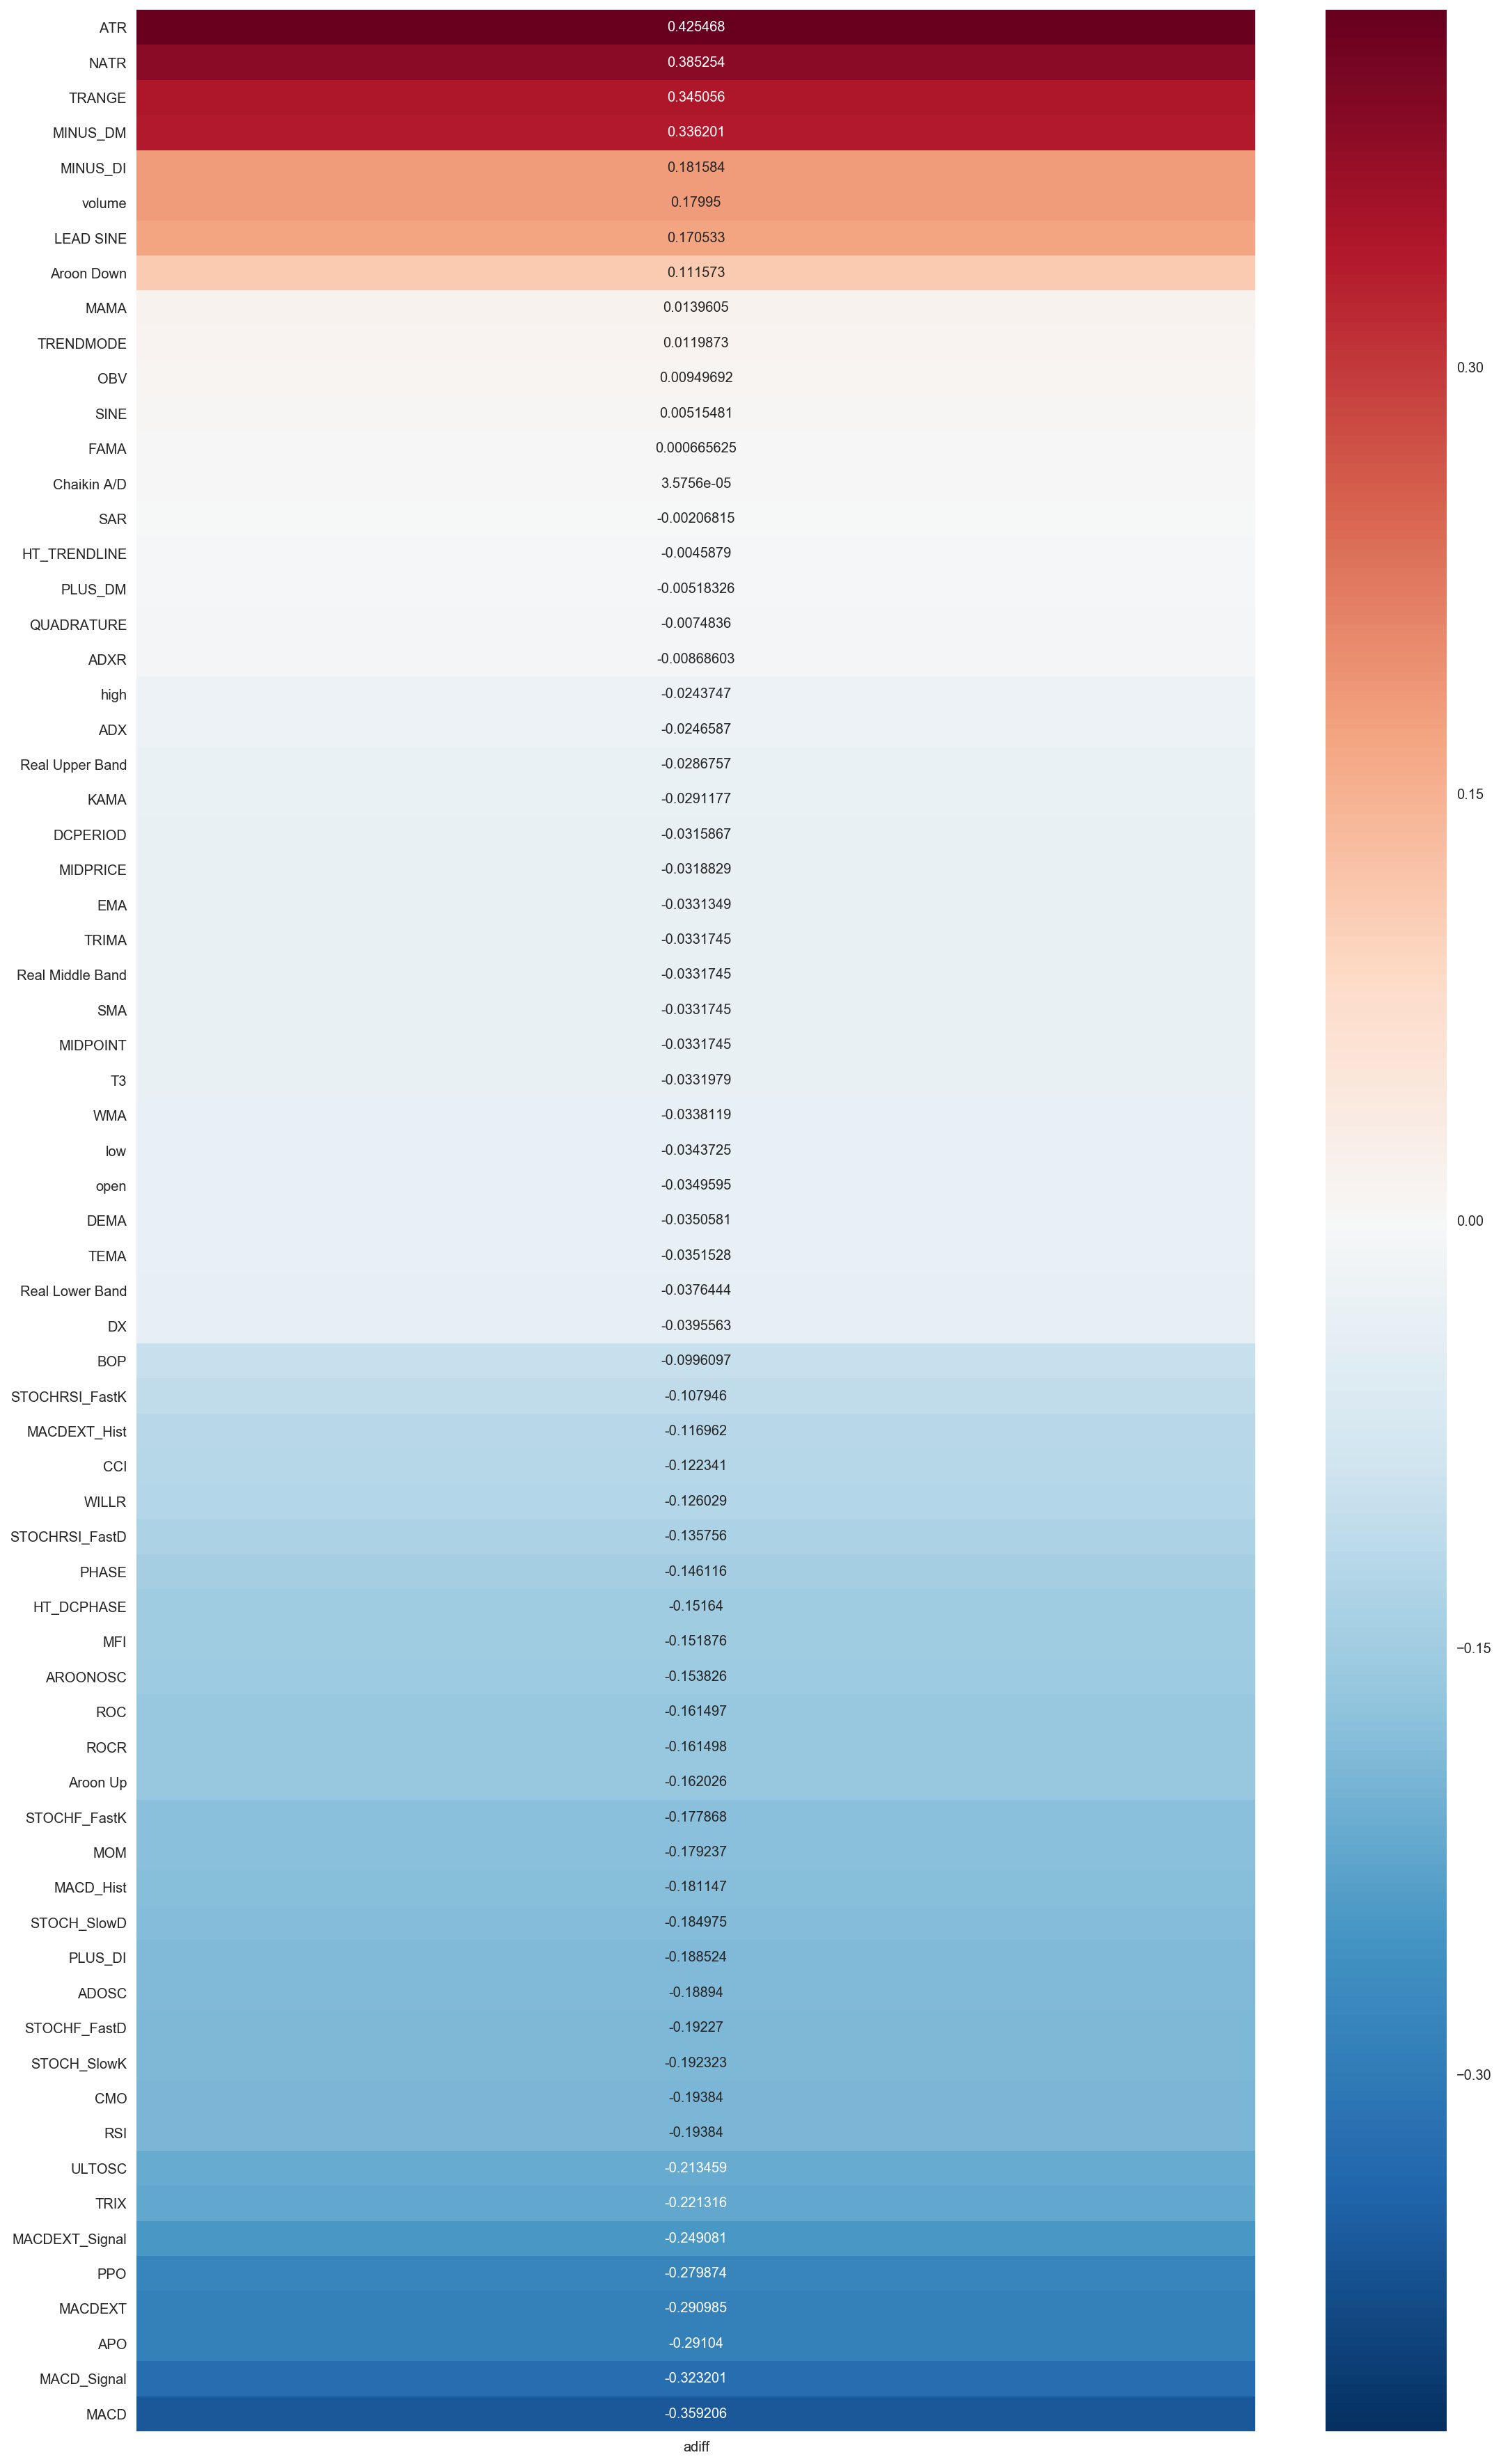

In [145]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df4.drop('close', axis=1).corr()[['adiff']].sort_values('adiff', ascending=False)[1:], ax=ax, annot=True, fmt='.6g')

In [147]:
X = df4.drop(['close', 'adiff'], axis=1)[-4000:-1].copy()
y = df4['adiff'].values[-4000:-1].copy()

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2999, 69) (2999,)
(1000, 69) (1000,)


In [148]:
dr = DummyRegressor()
dr.fit(X_train, y_train)
dr.score(X_test, y_test)

-6.5729806123959733e-05

In [149]:
r2_score(y, np.zeros_like(y))

-0.94930406221232011

In [150]:
mean_squared_error(y, np.zeros_like(y))

211.90000034853713

In [151]:
mean_absolute_error(y, np.zeros_like(y))

10.158471217804451

In [152]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)
print(mean_squared_error(y_test, preds))
print(mean_absolute_error(y_test, preds))

0.194947038475
77.8567780111
6.59569163746


In [153]:
df1.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,PLUS_DM,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC
2017-12-05,2629.5701,2665.1899,2639.0300,2629.27,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,11.3534,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08
2017-12-06,2629.2700,2648.7200,2627.7300,2636.98,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,5.6767,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08
2017-12-07,2636.9800,2634.4099,2624.7500,2651.50,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,9.4184,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08
2017-12-08,2651.5000,2640.9900,2626.5300,2659.99,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,15.3691,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08
2017-12-11,2659.9900,2651.6499,2644.1001,NaN,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,16.3647,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09
